# INTRODUCTION

- Nama: Argon
- Batch: HCK 004

Pada notebook ini akan dilakukan analisis mengenai data Covid-19 di negara United Kingdom selama periode 1 tahun (Januari - Desember 2021)

Objective: 
- Mengetahui tingkat rerata pertumbuhan angka kematian kasus covid-19 di negara United Kingdom selama tahun 2021

# IMPORT LIBRARY

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/argonriadi/Latihan-git/main/h8dsft_P0GC1_Argon-Riadi.csv')

In [4]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Anguilla,United Kingdom,2023-02-03,18.220600,-63.06860,POINT(-63.0686 18.2206),3904,12,NaN,NaN,NaN,NaN,"Anguilla, United Kingdom"
1,Falkland Islands (Malvinas),United Kingdom,2023-02-03,-51.796300,-59.52360,POINT(-59.5236 -51.7963),1930,0,NaN,NaN,NaN,NaN,"Falkland Islands (Malvinas), United Kingdom"
2,Scotland,United Kingdom,2023-02-03,56.490700,-4.20260,POINT(-4.2026 56.4907),2149502,16538,NaN,NaN,NaN,NaN,"Scotland, United Kingdom"
3,Unknown,United Kingdom,2023-02-03,NaN,NaN,NaN,0,334,NaN,NaN,NaN,NaN,"Unknown, United Kingdom"
4,Guernsey,United Kingdom,2023-02-03,49.448196,-2.58949,POINT(-2.58949 49.448196),34769,66,NaN,NaN,NaN,NaN,"Guernsey, United Kingdom"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16981,Gibraltar,United Kingdom,2020-03-12,36.140800,-5.35360,POINT(-5.3536 36.1408),1,0,1.0,NaN,NaN,NaN,NaN
16982,Channel Islands,United Kingdom,2020-03-12,49.372300,-2.36440,POINT(-2.3644 49.3723),2,0,0.0,NaN,NaN,NaN,NaN
16983,Gibraltar,United Kingdom,2020-03-11,36.140800,-5.35360,POINT(-5.3536 36.1408),1,0,1.0,NaN,NaN,NaN,NaN
16984,Channel Islands,United Kingdom,2020-03-11,49.372300,-2.36440,POINT(-2.3644 49.3723),2,0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16986 entries, 0 to 16985
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  16905 non-null  object 
 1   country_region  16986 non-null  object 
 2   date            16986 non-null  object 
 3   latitude        16018 non-null  float64
 4   longitude       16018 non-null  float64
 5   location_geom   16018 non-null  object 
 6   confirmed       16986 non-null  int64  
 7   deaths          16986 non-null  int64  
 8   recovered       7373 non-null   float64
 9   active          7324 non-null   float64
 10  fips            0 non-null      float64
 11  admin2          0 non-null      float64
 12  combined_key    16938 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 1.7+ MB


In [7]:
df['period_date']=pd.to_datetime(df['date'],infer_datetime_format=True)

In [8]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key,period_date
0,Anguilla,United Kingdom,2023-02-03,18.220600,-63.06860,POINT(-63.0686 18.2206),3904,12,NaN,NaN,NaN,NaN,"Anguilla, United Kingdom",2023-02-03
1,Falkland Islands (Malvinas),United Kingdom,2023-02-03,-51.796300,-59.52360,POINT(-59.5236 -51.7963),1930,0,NaN,NaN,NaN,NaN,"Falkland Islands (Malvinas), United Kingdom",2023-02-03
2,Scotland,United Kingdom,2023-02-03,56.490700,-4.20260,POINT(-4.2026 56.4907),2149502,16538,NaN,NaN,NaN,NaN,"Scotland, United Kingdom",2023-02-03
3,Unknown,United Kingdom,2023-02-03,NaN,NaN,NaN,0,334,NaN,NaN,NaN,NaN,"Unknown, United Kingdom",2023-02-03
4,Guernsey,United Kingdom,2023-02-03,49.448196,-2.58949,POINT(-2.58949 49.448196),34769,66,NaN,NaN,NaN,NaN,"Guernsey, United Kingdom",2023-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16981,Gibraltar,United Kingdom,2020-03-12,36.140800,-5.35360,POINT(-5.3536 36.1408),1,0,1.0,NaN,NaN,NaN,NaN,2020-03-12
16982,Channel Islands,United Kingdom,2020-03-12,49.372300,-2.36440,POINT(-2.3644 49.3723),2,0,0.0,NaN,NaN,NaN,NaN,2020-03-12
16983,Gibraltar,United Kingdom,2020-03-11,36.140800,-5.35360,POINT(-5.3536 36.1408),1,0,1.0,NaN,NaN,NaN,NaN,2020-03-11
16984,Channel Islands,United Kingdom,2020-03-11,49.372300,-2.36440,POINT(-2.3644 49.3723),2,0,0.0,NaN,NaN,NaN,NaN,2020-03-11


# MISSING VALUE & MANIPULATING COLUMNS

- Dalam section ini saya akan drop table yang tidak digunakan, menghilangkan dan mengganti nama data yang kosong ('fips','admin2','recovered','active').

- Menghapus table yang tidak digunakan ditujukan untuk bisa lebih fokus melihat informasi yang akan diambil

In [9]:
df.drop(columns=['fips','admin2','recovered','active'],inplace=True)


In [11]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,combined_key,period_date
0,Anguilla,United Kingdom,2023-02-03,18.220600,-63.068600,POINT(-63.0686 18.2206),3904,12,"Anguilla, United Kingdom",2023-02-03
1,Falkland Islands (Malvinas),United Kingdom,2023-02-03,-51.796300,-59.523600,POINT(-59.5236 -51.7963),1930,0,"Falkland Islands (Malvinas), United Kingdom",2023-02-03
2,Scotland,United Kingdom,2023-02-03,56.490700,-4.202600,POINT(-4.2026 56.4907),2149502,16538,"Scotland, United Kingdom",2023-02-03
4,Guernsey,United Kingdom,2023-02-03,49.448196,-2.589490,POINT(-2.58949 49.448196),34769,66,"Guernsey, United Kingdom",2023-02-03
5,Montserrat,United Kingdom,2023-02-03,16.742498,-62.187366,POINT(-62.187366 16.742498),1403,8,"Montserrat, United Kingdom",2023-02-03
...,...,...,...,...,...,...,...,...,...,...
16981,Gibraltar,United Kingdom,2020-03-12,36.140800,-5.353600,POINT(-5.3536 36.1408),1,0,NaN,2020-03-12
16982,Channel Islands,United Kingdom,2020-03-12,49.372300,-2.364400,POINT(-2.3644 49.3723),2,0,NaN,2020-03-12
16983,Gibraltar,United Kingdom,2020-03-11,36.140800,-5.353600,POINT(-5.3536 36.1408),1,0,NaN,2020-03-11
16984,Channel Islands,United Kingdom,2020-03-11,49.372300,-2.364400,POINT(-2.3644 49.3723),2,0,NaN,2020-03-11


In [10]:
df.drop(index=[3],inplace=True)

In [12]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,combined_key,period_date
0,Anguilla,United Kingdom,2023-02-03,18.220600,-63.068600,POINT(-63.0686 18.2206),3904,12,"Anguilla, United Kingdom",2023-02-03
1,Falkland Islands (Malvinas),United Kingdom,2023-02-03,-51.796300,-59.523600,POINT(-59.5236 -51.7963),1930,0,"Falkland Islands (Malvinas), United Kingdom",2023-02-03
2,Scotland,United Kingdom,2023-02-03,56.490700,-4.202600,POINT(-4.2026 56.4907),2149502,16538,"Scotland, United Kingdom",2023-02-03
4,Guernsey,United Kingdom,2023-02-03,49.448196,-2.589490,POINT(-2.58949 49.448196),34769,66,"Guernsey, United Kingdom",2023-02-03
5,Montserrat,United Kingdom,2023-02-03,16.742498,-62.187366,POINT(-62.187366 16.742498),1403,8,"Montserrat, United Kingdom",2023-02-03
...,...,...,...,...,...,...,...,...,...,...
16981,Gibraltar,United Kingdom,2020-03-12,36.140800,-5.353600,POINT(-5.3536 36.1408),1,0,NaN,2020-03-12
16982,Channel Islands,United Kingdom,2020-03-12,49.372300,-2.364400,POINT(-2.3644 49.3723),2,0,NaN,2020-03-12
16983,Gibraltar,United Kingdom,2020-03-11,36.140800,-5.353600,POINT(-5.3536 36.1408),1,0,NaN,2020-03-11
16984,Channel Islands,United Kingdom,2020-03-11,49.372300,-2.364400,POINT(-2.3644 49.3723),2,0,NaN,2020-03-11


In [13]:
df.fillna("Missing", inplace=True)

In [14]:
df

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,combined_key,period_date
0,Anguilla,United Kingdom,2023-02-03,18.2206,-63.0686,POINT(-63.0686 18.2206),3904,12,"Anguilla, United Kingdom",2023-02-03
1,Falkland Islands (Malvinas),United Kingdom,2023-02-03,-51.7963,-59.5236,POINT(-59.5236 -51.7963),1930,0,"Falkland Islands (Malvinas), United Kingdom",2023-02-03
2,Scotland,United Kingdom,2023-02-03,56.4907,-4.2026,POINT(-4.2026 56.4907),2149502,16538,"Scotland, United Kingdom",2023-02-03
4,Guernsey,United Kingdom,2023-02-03,49.448196,-2.58949,POINT(-2.58949 49.448196),34769,66,"Guernsey, United Kingdom",2023-02-03
5,Montserrat,United Kingdom,2023-02-03,16.742498,-62.187366,POINT(-62.187366 16.742498),1403,8,"Montserrat, United Kingdom",2023-02-03
...,...,...,...,...,...,...,...,...,...,...
16981,Gibraltar,United Kingdom,2020-03-12,36.1408,-5.3536,POINT(-5.3536 36.1408),1,0,Missing,2020-03-12
16982,Channel Islands,United Kingdom,2020-03-12,49.3723,-2.3644,POINT(-2.3644 49.3723),2,0,Missing,2020-03-12
16983,Gibraltar,United Kingdom,2020-03-11,36.1408,-5.3536,POINT(-5.3536 36.1408),1,0,Missing,2020-03-11
16984,Channel Islands,United Kingdom,2020-03-11,49.3723,-2.3644,POINT(-2.3644 49.3723),2,0,Missing,2020-03-11


# DATA QUERY

- Dalam section ini saya akan membuat query data yang bertujuan untuk mengambil informasi dari table yang mempunyai perhubungan data

In [15]:
df[['province_state','location_geom']].value_counts().head()

province_state   location_geom          
Gibraltar        POINT(-5.3536 36.1408)     1060
Channel Islands  POINT(-2.3644 49.3723)     1059
Cayman Islands   POINT(-81.2546 19.3133)    1055
Bermuda          POINT(-64.7505 32.3078)    1052
Isle of Man      POINT(-4.5481 54.2361)     1051
dtype: int64

In [16]:
df['province_state'].value_counts().head()

Gibraltar          1060
Channel Islands    1060
Cayman Islands     1055
Montserrat         1053
Bermuda            1052
Name: province_state, dtype: int64

In [17]:
df['location_geom'].value_counts().head()

POINT(-5.3536 36.1408)     1060
POINT(-2.3644 49.3723)     1059
POINT(-81.2546 19.3133)    1055
POINT(-64.7505 32.3078)    1052
POINT(-4.5481 54.2361)     1051
Name: location_geom, dtype: int64

Insight:

- Terdapat perbedaan output data (antara 'province_state' dengan 'location_geom' untuk Channel Islands, Montserrat & Bermuda

# Grouping and Aggregating

Dalam section ini saya akan menggabungkan table 'province_state' dengan variable table lain untuk mendapatkan insight tentang data covid di area UK selama 2021

In [25]:
df[(df['period_date'] >= '2021-1-1') &
  (df['period_date'] <= '2021-12-31')].groupby('province_state')[['confirmed','deaths']].mean()

,confirmed,deaths
province_state,,
Anguilla,3.594740e+02,0.679452
Bermuda,2.966633e+03,44.347945
British Virgin Islands,1.353510e+03,17.189041
Cayman Islands,1.546827e+03,2.684932
Channel Islands,8.422992e+03,90.747945
England,5.277684e+06,112322.769863
Falkland Islands (Malvinas),6.237534e+01,0.000000
Gibraltar,5.020693e+03,90.065753
Isle of Man,4.542263e+03,37.920548


In [20]:
df[(df['period_date'] >= '2021-1-1') &
  (df['period_date'] <= '2021-12-31')].groupby('province_state')[['deaths']].mean().sort_values(by='deaths', ascending=False)

,deaths
province_state,
England,112322.769863
Scotland,7896.002740
Wales,5602.063014
Northern Ireland,2281.295890
Channel Islands,90.747945
Gibraltar,90.065753
Bermuda,44.347945
Isle of Man,37.920548
Turks and Caicos Islands,17.978082


In [23]:
df[(df['period_date'] >= '2021-1-1') &
  (df['period_date'] <= '2021-12-31')].groupby('province_state')[['confirmed']].mean().sort_values(by='confirmed', ascending=False)

,confirmed
province_state,
England,5.277684e+06
Scotland,3.810648e+05
Wales,2.877471e+05
Northern Ireland,1.773826e+05
Channel Islands,8.422992e+03
Gibraltar,5.020693e+03
Isle of Man,4.542263e+03
Bermuda,2.966633e+03
Turks and Caicos Islands,2.445866e+03


Insight:
- England menjadi area dengan tingkat rerata kasus kemunculan & tingkat rerata kematian oleh covid-19 tertinggi selama tahun 2021 untuk regional UK

# Pandas Visualization

Dalam section ini saya akan memvisualisasikan data pertumbuhan covid-19 untuk area England selama tahun 2021 dari sisi pertumbuhan tingkat kematian & konfirmasi kasus baru tiap bulan. 

<AxesSubplot:xlabel='period_date'>

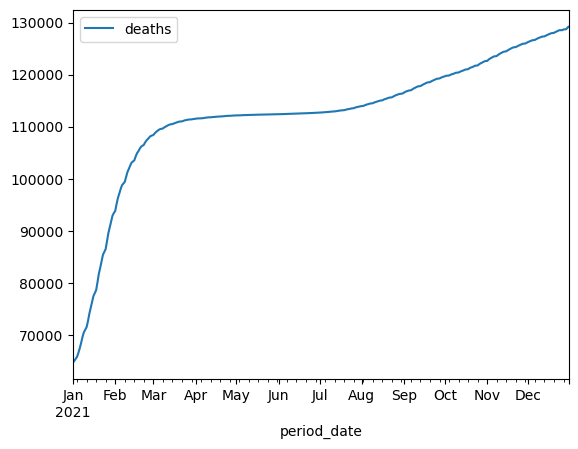

In [21]:
df[(df['province_state'] == 'England') &
    (df['period_date'] >='2021-1-1') &
    (df['period_date'] <= '2021-12-31')].groupby('period_date')[['deaths']].mean().plot()

Insight:
- Dari grafik di atas terlihat bahwa angka pertumbuhan kematian tertinggi oleh covid-19 untuk area England terjadi dalam Q1 2021 (Jan - Mar)
- Dari Q2 hingga Q4 (akhir tahun Des 2021) angka kematian oleh covid-19 lebih terkontrol

<AxesSubplot:xlabel='period_date'>

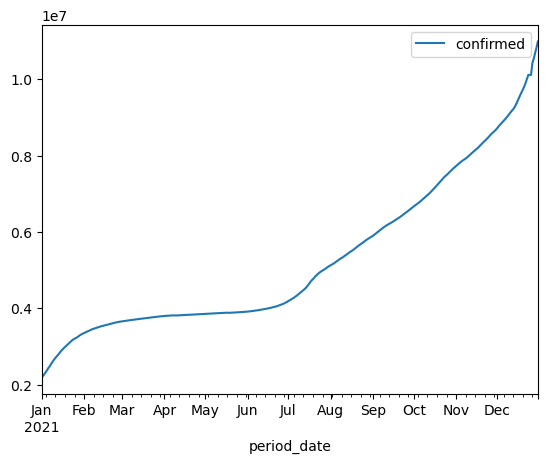

In [26]:
df[(df['province_state'] == 'England') &
    (df['period_date'] >='2021-1-1') &
    (df['period_date'] <= '2021-12-31')].groupby('period_date')[['confirmed']].mean().plot()

Insight:
- Dari grafik di atas terlihat bahwa angka pertumbuhan konfirmasi kasus baru covid-19 untuk area England masih terus terjadi hingga akhir tahun 2021 (Jan - Des)
- Dari Agustus hingga akhir tahun Des 2021 menjadi periode dengan pertumbuhan konfirmasi kasus baru covid-19 tertinggi untuk area England

<AxesSubplot:xlabel='province_state'>

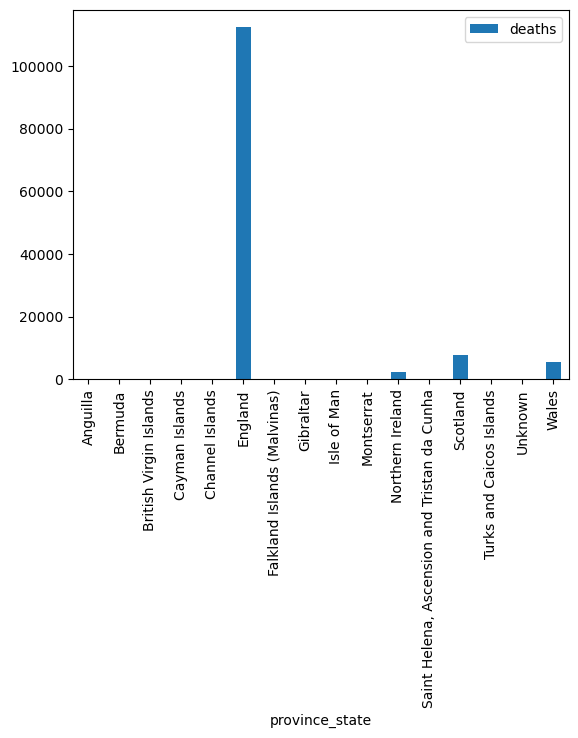

In [28]:
df[(df['period_date'] >='2021-1-1') &
    (df['period_date'] <= '2021-12-31')].groupby('province_state')[['deaths']].mean().plot(kind='bar')

Insight:
- Dari grafik di atas terlihat bahwa England menjadi area dengan tingkat angka kematian oleh covid-19 tertinggi selama periode tahun 2021 (Jan - Des) dalam regional UK 